# Classification Algorithms

Classification algorithms are a set of techniques used in machine learning algorithms used to categorize or classify data into pre defined classes or categories based on their features or attributes. They're used when the output variable is a category, such as determining whether an email is spam or not, predicting whether a customer will buy a product, or classify images of cats and dogs.


There are 13 attributes

__age__: age in years

__sex__: sex (1 = male; 0 = female)

__cp__: chest pain type

-- Value 1: typical angina
-- Value 2: atypical angina
-- Value 3: non-anginal pain
-- Value 4: asymptomatic

__trestbps__: resting blood pressure (in mm Hg on admission to the hospital)

__chol__: serum cholestoral in mg/dl

__fbs__: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

__restecg__: resting electrocardiographic results

-- Value 0: normal
-- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
-- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

__thalach__: maximum heart rate achieved

__exang__: exercise induced angina (1 = yes; 0 = no)

__oldpeak__ = ST depression induced by exercise relative to rest

__slope__: the slope of the peak exercise ST segment

-- Value 1: upsloping
-- Value 2: flat
-- Value 3: downsloping

__ca__: number of major vessels (0-3) colored by flourosopy

__thal__: 0 = normal; 1 = fixed defect; 2 = reversable defect

and the label

__target__: 

 0: "coronary heart disease",
    1: "aortic disease",
    2: "peripheral arterial disease",
    3: "stroke",
    4: "unknown"

In [1]:
import warnings
warnings.filterwarnings('ignore')

**Let's import all the necessary libraries.**

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
#load the dataset

df =pd.read_csv('heart_disease_dataset.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [4]:
#save the file in csv format
df.to_csv('heart_disease_dataset_with_null_values.csv', index=False)

In [5]:
# Check for missing values
print("Missing Values Before Cleaning:")
print(df.isnull().sum())

Missing Values Before Cleaning:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64


In [6]:
# Replace NaN values with the mean of the column
df['ca'].fillna(df['ca'].mean(), inplace=True)
df['thal'].fillna(df['thal'].mean(), inplace=True)

In [7]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
# Data Cleaning, dropping the rows
#df = df.dropna()

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.931209,1.933272,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [10]:
# Separate features (X) and target variable (y)
X = df.drop('target', axis=1)
y = df['target']

In [11]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.000000,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.000000,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.000000,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.000000,3.0,1
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,0.672241,3.0,0


In [12]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,29.0,1.0,2.0,130.0,204.0,0.0,2.0,202.0,0.0,0.0,1.0,0.0,3.0
202,57.0,1.0,3.0,150.0,126.0,1.0,0.0,173.0,0.0,0.2,1.0,1.0,7.0
196,69.0,1.0,1.0,160.0,234.0,1.0,2.0,131.0,0.0,0.1,2.0,1.0,3.0
75,65.0,0.0,3.0,160.0,360.0,0.0,2.0,151.0,0.0,0.8,1.0,0.0,3.0
176,52.0,1.0,4.0,108.0,233.0,1.0,0.0,147.0,0.0,0.1,1.0,3.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,54.0,1.0,2.0,192.0,283.0,0.0,2.0,195.0,0.0,0.0,1.0,1.0,7.0
71,67.0,1.0,4.0,125.0,254.0,1.0,0.0,163.0,0.0,0.2,2.0,2.0,7.0
106,59.0,1.0,4.0,140.0,177.0,0.0,0.0,162.0,1.0,0.0,1.0,1.0,7.0
270,61.0,1.0,4.0,140.0,207.0,0.0,2.0,138.0,1.0,1.9,1.0,1.0,7.0


In [13]:
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,53.0,1.0,3.0,130.0,246.0,1.0,2.0,173.0,0.0,0.0,1.0,3.0,3.0
228,54.0,1.0,4.0,110.0,206.0,0.0,2.0,108.0,1.0,0.0,2.0,1.0,3.0
111,56.0,1.0,4.0,125.0,249.0,1.0,2.0,144.0,1.0,1.2,2.0,1.0,3.0
246,58.0,1.0,4.0,100.0,234.0,0.0,0.0,156.0,0.0,0.1,1.0,1.0,7.0
60,51.0,0.0,4.0,130.0,305.0,0.0,0.0,142.0,1.0,1.2,2.0,0.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,62.0,1.0,2.0,128.0,208.0,1.0,2.0,140.0,0.0,0.0,1.0,0.0,3.0
104,49.0,1.0,3.0,120.0,188.0,0.0,0.0,139.0,0.0,2.0,2.0,3.0,7.0
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0
193,62.0,0.0,4.0,138.0,294.0,1.0,0.0,106.0,0.0,1.9,2.0,3.0,3.0


In [14]:
X_test.shape

(61, 13)

In [15]:
y_train

132    0
202    0
196    0
75     0
176    0
      ..
188    1
71     3
106    2
270    1
102    0
Name: target, Length: 242, dtype: int64

In [16]:
y_test

179    0
228    3
111    1
246    2
60     2
      ..
249    0
104    3
300    3
193    2
184    1
Name: target, Length: 61, dtype: int64

In [17]:
# Scale the features using Min-Max scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
X_train_scaled

array([[0.        , 1.        , 0.33333333, ..., 0.        , 0.        ,
        0.        ],
       [0.58333333, 1.        , 0.66666667, ..., 0.        , 0.33333333,
        1.        ],
       [0.83333333, 1.        , 0.        , ..., 0.5       , 0.33333333,
        0.        ],
       ...,
       [0.625     , 1.        , 1.        , ..., 0.        , 0.33333333,
        1.        ],
       [0.66666667, 1.        , 1.        , ..., 0.        , 0.33333333,
        1.        ],
       [0.58333333, 0.        , 1.        , ..., 0.        , 0.33333333,
        0.        ]])

In [19]:
#X_test_scaled

In [20]:
X_test_scaled.shape

(61, 13)

# Decision Tree

A decision tree classifier is a predictive model that's used in machine learning for solving classification problems. It works by creating a tree-like structure where internal nodes represent features, branches represent decisions based on these features, and leaf nodes represent the outcome, typically a class or a label.

In [21]:
# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled, y_train)
dt_predictions = dt_model.predict(X_test_scaled)

In [22]:
#from sklearn.externals import joblib
import pickle

# Save the model using pickle
with open('dt_model.pkl', 'wb') as model_file:
    pickle.dump(dt_model, model_file)

In [23]:
# Reset the indices of both DataFrames
X_test.reset_index(drop=True, inplace=True)

In [24]:
# Add the original 'target' column to the test set
X_test['target'] = y_test.values
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,53.0,1.0,3.0,130.0,246.0,1.0,2.0,173.0,0.0,0.0,1.0,3.0,3.0,0
1,54.0,1.0,4.0,110.0,206.0,0.0,2.0,108.0,1.0,0.0,2.0,1.0,3.0,3
2,56.0,1.0,4.0,125.0,249.0,1.0,2.0,144.0,1.0,1.2,2.0,1.0,3.0,1
3,58.0,1.0,4.0,100.0,234.0,0.0,0.0,156.0,0.0,0.1,1.0,1.0,7.0,2
4,51.0,0.0,4.0,130.0,305.0,0.0,0.0,142.0,1.0,1.2,2.0,0.0,7.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,62.0,1.0,2.0,128.0,208.0,1.0,2.0,140.0,0.0,0.0,1.0,0.0,3.0,0
57,49.0,1.0,3.0,120.0,188.0,0.0,0.0,139.0,0.0,2.0,2.0,3.0,7.0,3
58,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
59,62.0,0.0,4.0,138.0,294.0,1.0,0.0,106.0,0.0,1.9,2.0,3.0,3.0,2


In [25]:
# Map the target variable to the specified classes
class_mapping = {
    0: "coronary heart disease",
    1: "aortic disease",
    2: "peripheral arterial disease",
    3: "stroke",
    4: "unknown"
}

# Map the predicted_target column to the class labels
X_test['Original_Disease_Classes'] = X_test['target'].map(class_mapping)

# Display the updated X_test dataframe
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Original_Disease_Classes
0,53.0,1.0,3.0,130.0,246.0,1.0,2.0,173.0,0.0,0.0,1.0,3.0,3.0,0,coronary heart disease
1,54.0,1.0,4.0,110.0,206.0,0.0,2.0,108.0,1.0,0.0,2.0,1.0,3.0,3,stroke
2,56.0,1.0,4.0,125.0,249.0,1.0,2.0,144.0,1.0,1.2,2.0,1.0,3.0,1,aortic disease
3,58.0,1.0,4.0,100.0,234.0,0.0,0.0,156.0,0.0,0.1,1.0,1.0,7.0,2,peripheral arterial disease
4,51.0,0.0,4.0,130.0,305.0,0.0,0.0,142.0,1.0,1.2,2.0,0.0,7.0,2,peripheral arterial disease
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,62.0,1.0,2.0,128.0,208.0,1.0,2.0,140.0,0.0,0.0,1.0,0.0,3.0,0,coronary heart disease
57,49.0,1.0,3.0,120.0,188.0,0.0,0.0,139.0,0.0,2.0,2.0,3.0,7.0,3,stroke
58,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3,stroke
59,62.0,0.0,4.0,138.0,294.0,1.0,0.0,106.0,0.0,1.9,2.0,3.0,3.0,2,peripheral arterial disease


In [26]:
# Add a new column 'predicted' to the test set
X_test['dt_predicted'] = dt_predictions
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Original_Disease_Classes,dt_predicted
0,53.0,1.0,3.0,130.0,246.0,1.0,2.0,173.0,0.0,0.0,1.0,3.0,3.0,0,coronary heart disease,0
1,54.0,1.0,4.0,110.0,206.0,0.0,2.0,108.0,1.0,0.0,2.0,1.0,3.0,3,stroke,0
2,56.0,1.0,4.0,125.0,249.0,1.0,2.0,144.0,1.0,1.2,2.0,1.0,3.0,1,aortic disease,2
3,58.0,1.0,4.0,100.0,234.0,0.0,0.0,156.0,0.0,0.1,1.0,1.0,7.0,2,peripheral arterial disease,2
4,51.0,0.0,4.0,130.0,305.0,0.0,0.0,142.0,1.0,1.2,2.0,0.0,7.0,2,peripheral arterial disease,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,62.0,1.0,2.0,128.0,208.0,1.0,2.0,140.0,0.0,0.0,1.0,0.0,3.0,0,coronary heart disease,0
57,49.0,1.0,3.0,120.0,188.0,0.0,0.0,139.0,0.0,2.0,2.0,3.0,7.0,3,stroke,1
58,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3,stroke,2
59,62.0,0.0,4.0,138.0,294.0,1.0,0.0,106.0,0.0,1.9,2.0,3.0,3.0,2,peripheral arterial disease,2


In [27]:
# Display the classification report and confusion matrix
print("\nDecision Tree Classification Report:")
print(classification_report(y_test, dt_predictions))


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.79      0.78        29
           1       0.30      0.25      0.27        12
           2       0.31      0.44      0.36         9
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         4

    accuracy                           0.49        61
   macro avg       0.27      0.30      0.28        61
weighted avg       0.47      0.49      0.48        61



In [28]:
print("Decision Tree Confusion Matrix:")
print(confusion_matrix(y_test, dt_predictions))

Decision Tree Confusion Matrix:
[[23  1  4  1  0]
 [ 4  3  4  1  0]
 [ 1  1  4  2  1]
 [ 1  4  1  0  1]
 [ 1  1  0  2  0]]


In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
# Confusion Matrices
def plot_confusion_matrix(cm, classes, model_name):
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(f'{model_name} Confusion Matrix')
    plt.colorbar()

    tick_marks = range(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    for i in range(len(classes)):
        for j in range(len(classes)):
            plt.text(j, i, str(cm[i, j]), ha='center', va='center')

    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

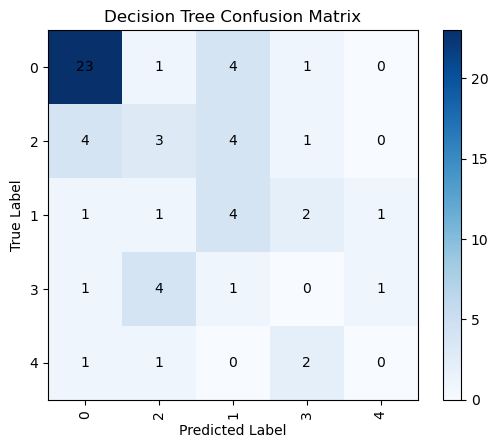

In [30]:
# Decision Tree Confusion Matrix
dt_cm = confusion_matrix(y_test, dt_predictions)
plot_confusion_matrix(dt_cm, df['target'].unique(), 'Decision Tree')

# Random Forest

In [31]:
# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)
rf_predictions = rf_model.predict(X_test_scaled)
rf_predictions

array([0, 1, 2, 0, 1, 2, 2, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 3, 2, 0, 0, 0,
       3, 0, 3, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 2, 0, 1, 0,
       0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 2, 1, 0, 0], dtype=int64)

In [32]:
#from sklearn.externals import joblib
import pickle

# Save the model using pickle
with open('rf_model.pkl', 'wb') as model_file:
    pickle.dump(rf_model, model_file)

In [33]:
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_predictions))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.97      0.82        29
           1       0.10      0.08      0.09        12
           2       0.14      0.11      0.12         9
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         4

    accuracy                           0.49        61
   macro avg       0.19      0.23      0.21        61
weighted avg       0.38      0.49      0.43        61



In [34]:
print("Random Forest Confusion Matrix:")
print(confusion_matrix(y_test, rf_predictions))

Random Forest Confusion Matrix:
[[28  0  1  0  0]
 [ 6  1  3  2  0]
 [ 4  2  1  2  0]
 [ 1  5  1  0  0]
 [ 0  2  1  1  0]]


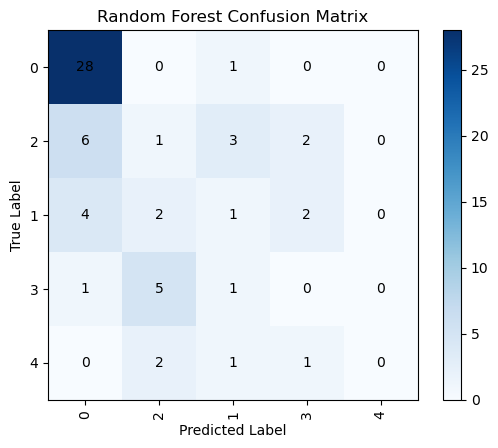

In [35]:
# Random Forest Confusion Matrix
dt_cm = confusion_matrix(y_test, rf_predictions)
plot_confusion_matrix(dt_cm, df['target'].unique(), 'Random Forest')

In [36]:
# Add a new column 'predicted' to the test set
X_test['rf_predicted'] = rf_predictions
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Original_Disease_Classes,dt_predicted,rf_predicted
0,53.0,1.0,3.0,130.0,246.0,1.0,2.0,173.0,0.0,0.0,1.0,3.0,3.0,0,coronary heart disease,0,0
1,54.0,1.0,4.0,110.0,206.0,0.0,2.0,108.0,1.0,0.0,2.0,1.0,3.0,3,stroke,0,1
2,56.0,1.0,4.0,125.0,249.0,1.0,2.0,144.0,1.0,1.2,2.0,1.0,3.0,1,aortic disease,2,2
3,58.0,1.0,4.0,100.0,234.0,0.0,0.0,156.0,0.0,0.1,1.0,1.0,7.0,2,peripheral arterial disease,2,0
4,51.0,0.0,4.0,130.0,305.0,0.0,0.0,142.0,1.0,1.2,2.0,0.0,7.0,2,peripheral arterial disease,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,62.0,1.0,2.0,128.0,208.0,1.0,2.0,140.0,0.0,0.0,1.0,0.0,3.0,0,coronary heart disease,0,0
57,49.0,1.0,3.0,120.0,188.0,0.0,0.0,139.0,0.0,2.0,2.0,3.0,7.0,3,stroke,1,2
58,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3,stroke,2,1
59,62.0,0.0,4.0,138.0,294.0,1.0,0.0,106.0,0.0,1.9,2.0,3.0,3.0,2,peripheral arterial disease,2,0


# Support Vector Machine

In [37]:
# Support Vector Machine (SVM)
svm_model = SVC(random_state=42)
svm_model.fit(X_train_scaled, y_train)
svm_predictions = svm_model.predict(X_test_scaled)
svm_predictions

array([0, 3, 3, 0, 1, 3, 1, 3, 0, 0, 0, 0, 0, 1, 3, 0, 0, 3, 2, 0, 0, 0,
       3, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 0, 2, 1, 0, 0], dtype=int64)

In [38]:
#from sklearn.externals import joblib
import pickle

# Save the model using pickle
with open('svm_model.pkl', 'wb') as model_file:
    pickle.dump(svm_model, model_file)

In [39]:
print("SVM Classification Report:")
print(classification_report(y_test, svm_predictions))

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.97      0.80        29
           1       0.40      0.17      0.24        12
           2       0.00      0.00      0.00         9
           3       0.25      0.43      0.32         7
           4       0.00      0.00      0.00         4

    accuracy                           0.54        61
   macro avg       0.27      0.31      0.27        61
weighted avg       0.43      0.54      0.46        61



In [40]:
print("SVM Confusion Matrix:")
print(confusion_matrix(y_test, svm_predictions))

SVM Confusion Matrix:
[[28  0  1  0  0]
 [ 6  2  0  4  0]
 [ 4  2  0  3  0]
 [ 2  1  1  3  0]
 [ 1  0  1  2  0]]


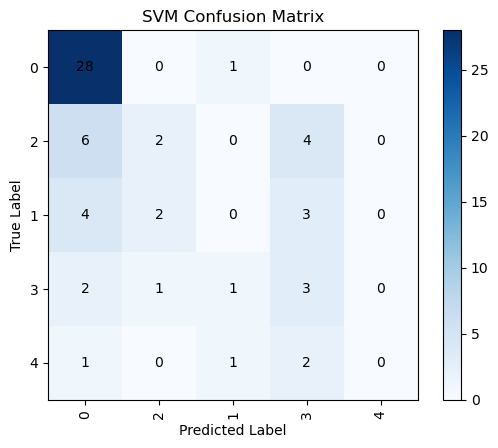

In [41]:
# SVM Confusion Matrix
dt_cm = confusion_matrix(y_test, svm_predictions)
plot_confusion_matrix(dt_cm, df['target'].unique(), 'SVM')

In [42]:
# Add a new column 'predicted' to the test set
X_test['svm_predicted'] = svm_predictions
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Original_Disease_Classes,dt_predicted,rf_predicted,svm_predicted
0,53.0,1.0,3.0,130.0,246.0,1.0,2.0,173.0,0.0,0.0,1.0,3.0,3.0,0,coronary heart disease,0,0,0
1,54.0,1.0,4.0,110.0,206.0,0.0,2.0,108.0,1.0,0.0,2.0,1.0,3.0,3,stroke,0,1,3
2,56.0,1.0,4.0,125.0,249.0,1.0,2.0,144.0,1.0,1.2,2.0,1.0,3.0,1,aortic disease,2,2,3
3,58.0,1.0,4.0,100.0,234.0,0.0,0.0,156.0,0.0,0.1,1.0,1.0,7.0,2,peripheral arterial disease,2,0,0
4,51.0,0.0,4.0,130.0,305.0,0.0,0.0,142.0,1.0,1.2,2.0,0.0,7.0,2,peripheral arterial disease,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,62.0,1.0,2.0,128.0,208.0,1.0,2.0,140.0,0.0,0.0,1.0,0.0,3.0,0,coronary heart disease,0,0,0
57,49.0,1.0,3.0,120.0,188.0,0.0,0.0,139.0,0.0,2.0,2.0,3.0,7.0,3,stroke,1,2,2
58,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3,stroke,2,1,1
59,62.0,0.0,4.0,138.0,294.0,1.0,0.0,106.0,0.0,1.9,2.0,3.0,3.0,2,peripheral arterial disease,2,0,0


In [43]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler


# Assuming 'new_data' is a DataFrame with the same columns as your original dataset (excluding the target column)
new_data = pd.DataFrame({
    'age': [58.0],
    'sex': [1.0],
    'cp': [4.0],
    'trestbps': [128.0],
    'chol': [216.0],
    'fbs': [0.0],
    'restecg': [2.0],
    'thalach': [131.0],
    'exang': [1.0],
    'oldpeak': [2.2],
    'slope': [2.0],
    'ca': [3.0],
    'thal': [7.0]
})

# Scale the features of the new data using the same scaler
new_data_scaled = scaler.transform(new_data)

# Make predictions on the new data
new_predictions = dt_model.predict(new_data_scaled)

# Add a new column 'predicted_target' to the new data
new_data['predicted_target'] = new_predictions

# Display the DataFrame with the new column
new_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,predicted_target
0,58.0,1.0,4.0,128.0,216.0,0.0,2.0,131.0,1.0,2.2,2.0,3.0,7.0,1


In [44]:
# Assuming dt_model is your trained Decision Tree model
# Assuming scaler is the scaler used during training

# Load your unseen data
unseen_data = pd.read_csv('unseen_heart_disease_data.csv')
unseen_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,120,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,63,0,3,135,252,0,2,172,0,0.0,1,0,3,0
95,52,1,4,128,255,0,0,161,1,0.0,1,1,7,1
96,59,1,4,110,239,0,2,142,1,1.2,2,1,7,2
97,60,0,4,150,258,0,2,157,0,2.6,2,2,7,3


In [45]:
# Separate the features from the 'target' column
X_unseen = unseen_data.drop('target', axis=1)
X_unseen

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7
3,37,1,3,120,250,0,0,187,0,3.5,3,0,3
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,63,0,3,135,252,0,2,172,0,0.0,1,0,3
95,52,1,4,128,255,0,0,161,1,0.0,1,1,7
96,59,1,4,110,239,0,2,142,1,1.2,2,1,7
97,60,0,4,150,258,0,2,157,0,2.6,2,2,7


In [46]:
# Scale the features (assuming you used a scaler during training)
X_unseen_scaled = scaler.transform(X_unseen)
X_unseen_scaled

array([[0.70833333, 1.        , 0.        , ..., 1.        , 0.        ,
        0.75      ],
       [0.79166667, 1.        , 1.        , ..., 0.5       , 1.        ,
        0.        ],
       [0.79166667, 1.        , 1.        , ..., 0.5       , 0.66666667,
        1.        ],
       ...,
       [0.625     , 1.        , 1.        , ..., 0.5       , 0.33333333,
        1.        ],
       [0.64583333, 0.        , 1.        , ..., 0.5       , 0.66666667,
        1.        ],
       [0.47916667, 1.        , 0.33333333, ..., 0.        , 0.33333333,
        0.        ]])

In [47]:
# Map the target variable to the specified classes
class_mapping = {
    0: "coronary heart disease",
    1: "aortic disease",
    2: "peripheral arterial disease",
    3: "stroke",
    4: "unknown"
}

In [48]:
# Map the predicted_target column to the class labels
unseen_data['Original_Disease_Classes'] = unseen_data['target'].map(class_mapping)

# Display the updated dataframe
unseen_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Original_Disease_Classes
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0,coronary heart disease
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2,peripheral arterial disease
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1,aortic disease
3,37,1,3,120,250,0,0,187,0,3.5,3,0,3,0,coronary heart disease
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0,coronary heart disease
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,63,0,3,135,252,0,2,172,0,0.0,1,0,3,0,coronary heart disease
95,52,1,4,128,255,0,0,161,1,0.0,1,1,7,1,aortic disease
96,59,1,4,110,239,0,2,142,1,1.2,2,1,7,2,peripheral arterial disease
97,60,0,4,150,258,0,2,157,0,2.6,2,2,7,3,stroke


In [49]:
# Make predictions on unseen data for each model
dt_predictions = dt_model.predict(X_unseen_scaled)
rf_predictions = rf_model.predict(X_unseen_scaled)
svm_predictions = svm_model.predict(X_unseen_scaled)

print(dt_predictions)

[0 2 1 0 0 0 3 2 2 1 0 0 2 0 0 0 1 0 0 0 0 0 1 3 3 0 0 0 0 3 0 2 1 3 0 0 3
 1 3 0 4 0 0 0 1 0 0 4 0 0 0 0 2 0 1 1 1 0 0 0 1 0 1 0 2 2 1 0 2 1 0 3 1 1
 1 0 2 0 0 3 0 0 0 3 0 0 0 0 0 0 0 3 2 0 0 1 2 3 0]


In [50]:
# Add the predicted columns to the unseen data
unseen_data['dt_predicted'] = dt_predictions
unseen_data['rf_predicted'] = rf_predictions
unseen_data['svm_predicted'] = svm_predictions


In [51]:
unseen_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Original_Disease_Classes,dt_predicted,rf_predicted,svm_predicted
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0,coronary heart disease,0,0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2,peripheral arterial disease,2,2,3
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1,aortic disease,1,1,3
3,37,1,3,120,250,0,0,187,0,3.5,3,0,3,0,coronary heart disease,0,0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0,coronary heart disease,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,63,0,3,135,252,0,2,172,0,0.0,1,0,3,0,coronary heart disease,0,0,0
95,52,1,4,128,255,0,0,161,1,0.0,1,1,7,1,aortic disease,1,1,1
96,59,1,4,110,239,0,2,142,1,1.2,2,1,7,2,peripheral arterial disease,2,2,3
97,60,0,4,150,258,0,2,157,0,2.6,2,2,7,3,stroke,3,3,3
